In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-news-headlines/news_headlines_20_days.csv
/kaggle/input/uk-news-headlines/news-websites_aux-data.xlsx


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/uk-news-headlines/news_headlines_20_days.csv')

In [4]:
df

,id,website,timestamp scraped,headline
0,1,BBC,2023-02-13 13-58-50,Mystery surrounds objects shot down by US mili...
1,2,BBC,2023-02-13 13-58-50,China says US balloons breached airspace at le...
2,3,BBC,2023-02-13 13-58-50,"Brianna's death has left massive hole, says fa..."
3,4,BBC,2023-02-13 13-58-50,Wegovy weight loss jab to be sold by UK chemis...
4,5,BBC,2023-02-13 13-58-50,Meteoroid lights up sky above English Channel
...,...,...,...,...
33191,33192,Evening Standard,2023-03-05 02-01-45,Pressure on Johnson grows over whether MPs wer...
33192,33193,Evening Standard,2023-03-05 02-01-45,"Liverpool vs Manchester United: Prediction, ki..."
33193,33194,Evening Standard,2023-03-05 02-01-45,Stone of Destiny should not be sent for corona...
33194,33195,Evening Standard,2023-03-05 02-01-45,Liverpool XI vs Manchester United: Confirmed t...


## Checking Data Types

In [5]:
df.dtypes

id                    int64
website              object
timestamp scraped    object
headline             object
dtype: object

In [6]:
#Changing 'timestamp scraped' datatype from object to datetime
df['timestamp scraped'] = pd.to_datetime(df['timestamp scraped'], format='%Y-%m-%d %H-%M-%S')

In [7]:
#Range of Timestamp of data
end_time = df['timestamp scraped'].max()
start_time = df['timestamp scraped'].min()
print('We have headline data from ',start_time,'to ',end_time)

We have headline data from  2023-02-13 13:58:50 to  2023-03-05 02:01:45


In [8]:
# Count of Unique Timestamps
len(df['timestamp scraped'].unique())

146

In [9]:
# Count of Days
len(df['timestamp scraped'].dt.day.unique())

21

In [10]:
headline_by_websites = df.pivot_table(values='headline',index='website',aggfunc=np.count_nonzero).sort_values('headline',ascending=False)
headline_by_websites.rename(columns={'headline':'Count of Headlines'},inplace=True)
headline_by_websites

,Count of Headlines
website,
Daily Mail,5798
Guardian,4552
Telegraph,4000
Evening Standard,3994
Independent,3716
Times,2000
BBC,1961
Metro,1200
Sun,1200


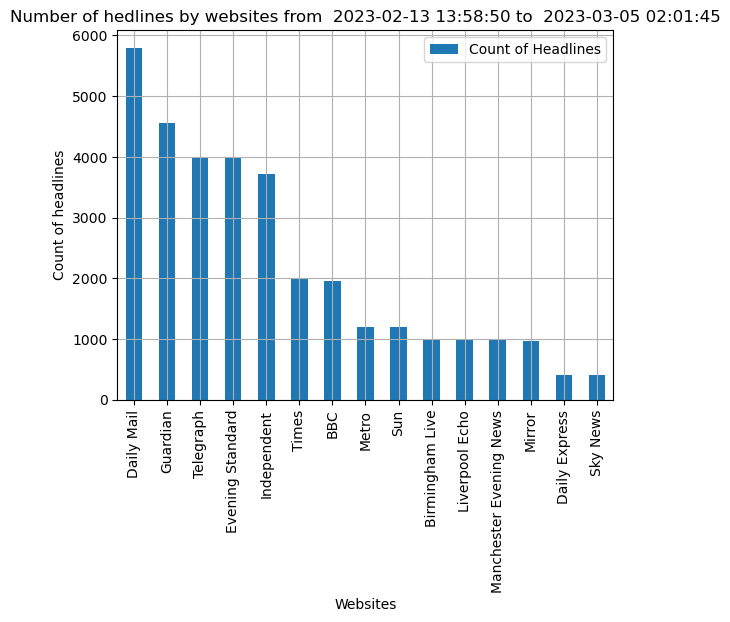

In [11]:
headline_by_websites.plot(kind='bar',title ='Number of hedlines by websites from  2023-02-13 13:58:50 to  2023-03-05 02:01:45',xlabel=
                         'Websites',ylabel='Count of headlines',grid=True)
plt.show()

In [12]:
pd.set_option('display.max_columns',22)
df['day of Timestamp'] = df['timestamp scraped'].dt.day
headlines_daywise_websitewise = df.pivot_table(values='headline',index='website',columns='day of Timestamp',aggfunc=np.count_nonzero,margins=True)
headlines_daywise_websitewise

day of Timestamp,1,2,3,4,5,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,All
website,,,,,,,,,,,,,,,,,,,,,,
BBC,101,99,102,82,37,71,100,101,101,84,84,69,81,86,82,90,111,108,112,141,119,1961
Birmingham Live,50,50,50,50,25,25,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,1000
Daily Express,20,20,20,20,10,10,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,400
Daily Mail,281,288,329,296,154,120,283,298,262,274,325,298,234,283,258,295,302,335,323,260,300,5798
Evening Standard,200,200,200,200,100,100,200,200,200,200,200,200,200,200,200,200,200,200,194,200,200,3994
Guardian,226,227,229,230,116,111,220,231,238,241,233,226,227,225,227,222,227,223,223,222,228,4552
Independent,200,200,200,185,58,100,200,200,200,200,197,144,200,200,200,200,200,177,113,142,200,3716
Liverpool Echo,50,50,50,50,25,25,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,1000
Manchester Evening News,50,50,50,50,25,25,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,1000


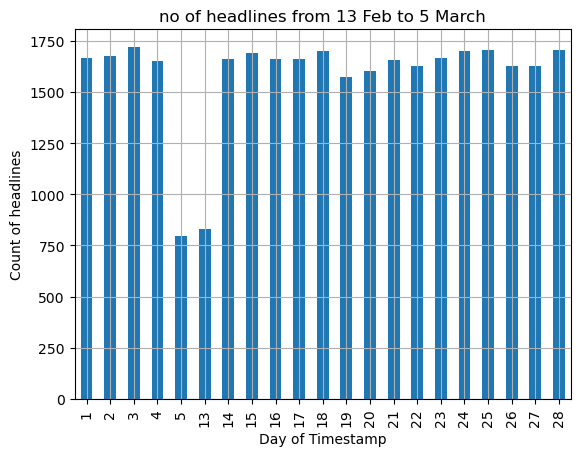

In [13]:
headlines_daywise = headlines_daywise_websitewise.loc['All']
headlines_daywise = headlines_daywise[0:len(headlines_daywise)-1]
headlines_daywise.plot(kind='bar',title='no of headlines from 13 Feb to 5 March',xlabel='Day of Timestamp',ylabel='Count of headlines',grid=True)
plt.show()

## WordCloud of Headlines

**Stopwords are those words which does not concerns much in word cloud.**

In [14]:
#list of 700 stopwords
stopwords700 = ["enclosed", "every", "word", "in", "double", "quotes", "and", "add", "comma", "after", "x", "y", "your", "yours", "yourself", "yourselves", "you", "yond", "yonder", "yon", "ye", "yet", "z", "zillion", "j", "u", "umpteen", "usually", "us", "username", "uponed", "upons", "uponing", "upon", "ups", "upping", "upped", "up", "unto", "until", "unless", "unlike", "unliker", "unlikest", "under", "underneath", "use", "used", "usedest", "r", "rath", "rather", "rathest", "rathe", "re", "relate", "related", "relatively", "regarding", "really", "res", "respecting", "respectively", "q", "quite", "que", "qua", "n", "neither", "neaths", "neath", "nethe", "nethermost", "necessary", "necessariest", "necessarier", "never", "nevertheless", "nigh", "nighest", "nigher", "nine", "noone", "nobody", "nobodies", "nowhere", "nowheres", "no", "noes", "nor", "nos", "no-one", "none", "not", "notwithstanding", "nothings", "nothing", "nathless", "natheless", "t", "ten", "tills", "till", "tilled", "tilling", "to", "towards", "toward", "towardest", "towarder", "together", "too", "thy", "thyself", "thus", "than", "that", "those", "thou", "though", "thous", "thouses", "thoroughest", "thorougher", "thorough", "thoroughly", "thru", "thruer", "thruest", "thro", "through", "throughout", "throughest", "througher", "thine", "this", "thises", "they", "thee", "the", "then", "thence", "thenest", "thener", "them", "themselves", "these", "therer", "there", "thereby", "therest", "thereafter", "therein", "thereupon", "therefore", "their", "theirs", "thing", "things", "three", "two", "o", "oh", "owt", "owning", "owned", "own", "owns", "others", "other", "otherwise", "otherwisest", "otherwiser", "of", "often", "oftener", "oftenest", "off", "offs", "offest", "one", "ought", "oughts", "our", "ours", "ourselves", "ourself", "out", "outest", "outed", "outwith", "outs", "outside", "over", "overallest", "overaller", "overalls", "overall", "overs", "or", "orer", "orest", "on", "oneself", "onest", "ons", "onto", "a", "atween", "at", "athwart", "atop", "afore"]

In [15]:
#list of 192 stopwords
stopwords192 = list(STOPWORDS)

In [16]:
#list of 2000 stopwords
stopwords2000 = ["able", "about", "above", "across", "actually", "add", "added", "adding", "additional", "after", "again", "against", "ago", "ahead", "ain't", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "aren't", "around", "as", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "big", "both", "brief", "but", "by", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "changes", "clearly", "c'mon", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "currently", "definitely", "described", "despite", "did", "didn't", "different", "do", "does", "doesn't", "doing", "don't", "done", "down", "downwards", "during", "each", "edu", "eg", "eight", "either", "else", "elsewhere", "entirely", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "far", "few", "fifth", "first", "five", "followed", "following", "follows", "for", "former", "formerly", "forth", "four", "from", "further", "furthermore", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "here's", "hereupon", "hers", "herself", "he's", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "i'd", "ie", "if", "ignored", "i'll", "i'm", "immediate", "in", "inasmuch", "inc", "indeed", "indicate", "indicated", "indicates", "indicate", "indicating", "inner", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "its", "itself", "i've", "just", "keep", "keeps", "kept", "know", "known", "knows", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked", "likely", "likewise", "little", "look", "looking", "looks", "low", "lower", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "meanwhile", "merely", "might", "million", "miss", "missed", "misses", "missing", "modified", "moi", "more", "moreover", "most", "mostly", "mr", "mrs", "ms", "much", "must", "mustn't", "my", "myself", "namely", "nd", "near", "nearly", "necessary", "need", "needed", "needing", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "no-one", "nor", "normally", "not", "nothing", "novel", "now", "nowhere", "o'clock", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "one's", "only", "onto", "opposite", "or", "other", "others", "otherwise", "ought", "oughtn't", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "p", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably", "provided", "provides", "put", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really", "reasonably", "recent", "recently", "regarding", "regardless", "regards", "relatively", "respectively", "right", "round", "s", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "since", "six", "so", "some", "somebody", "someday", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "", "t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "there'd", "therefore", "therein", "there'll", "there're", "theres", "there's", "thereupon", "there've", "these", "they", "they'd", "they'll", "they're", "they've", "thing", "things", "think", "third", "thirty", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "till", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "t's", "twice", "two", "u", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "uses", "using", "usually", "uucp", "v", "value", "various", "versus", "very", "via", "viz", "vs", "w", "want", "wants", "was", "wasn't", "way", "we", "we'd", "welcome", "well", "we'll", "went", "were", "we're", "weren't", "we've", "what", "whatever", "what'll", "what's", "what've", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "where's", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whither", "who", "who'd", "whoever", "whole", "who'll", "whom", "whomever", "who's", "whose", "why", "will", "willing", "wish", "with", "within", "without", "wonder", "won't", "would", "wouldn't", "x", "y", "yes", "yet", "you", "you'd", "you'll", "your", "you're", "yours", "yourself", "yourselves", "you've", "z", "zero"
]

In [17]:
stopwords_bulk = stopwords700 + stopwords192 + stopwords2000
stopwords_bulk = set(stopwords_bulk)

In [18]:
headline_data = ' '.join(df['headline'])
headline_data[0:500] #printing only few lines here

"Mystery surrounds objects shot down by US military China says US balloons breached airspace at least 10 times Brianna's death has left massive hole, says family Wegovy weight loss jab to be sold by UK chemist shops Meteoroid lights up sky above English Channel Rihanna reveals she's pregnant at Super Bowl half-time show Russian mercenary video shows new brutal killing of 'traitor' Labour accuse Tories of spending sprees on hotels, dining and gifts Police apologise to Caroline Flack's family over "

In [19]:
wordcloud = WordCloud(width=800,height=400,background_color='white',stopwords=stopwords_bulk).generate(headline_data)

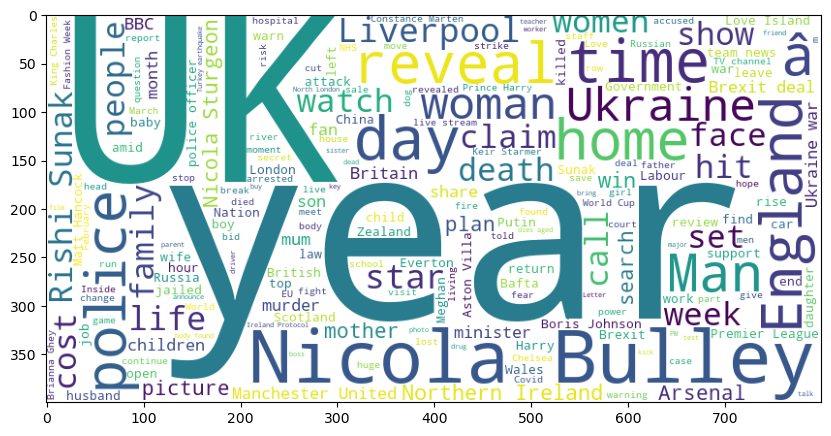

In [20]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()